In [39]:
from list_change import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset

In [40]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [41]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [42]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [43]:
len(data)

24

In [44]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]]])

In [45]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [46]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [47]:
Y.shape

(24, 2, 3, 2)

In [48]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
X_test, Y_test = formating(X_test, Y_test)

In [49]:
X_test.shape

(10, 3, 2)

In [50]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
for epoch in range(20):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
    l0.append(model.evaluate(X_test, Y_test))

1/1 [==============================] - 0s 16ms/step - loss: 1420.4246


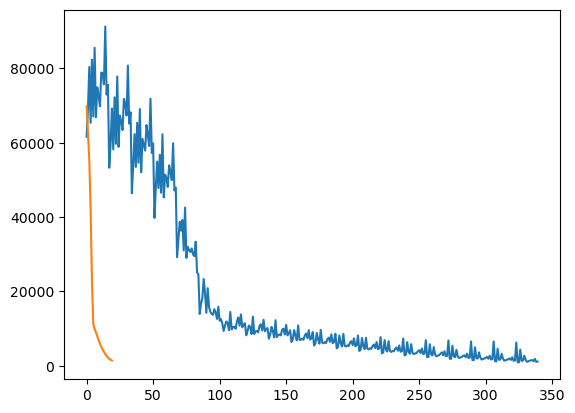

In [51]:
plt.plot(l)
plt.plot(l0)
plt.show()

In [59]:

# model.evaluate(x,y)

[[[  24. -351.]
  [  82. -386.]
  [ 162. -462.]]

 [[  18. -330.]
  [ -27. -297.]
  [  69. -407.]]]
[[[  59. -349.]
  [ 121. -419.]
  [ 169. -459.]]

 [[  12. -312.]
  [ -57. -276.]
  [  91. -408.]]]
[[[  50. -361.]
  [ 116. -426.]
  [ 157. -469.]]

 [[   9. -306.]
  [ -32. -258.]
  [  40. -411.]]]
[[[  18. -387.]
  [  15. -383.]
  [ 132. -468.]]

 [[ -44. -173.]
  [-139. -144.]
  [  38. -291.]]]
[[[  46. -384.]
  [  38. -372.]
  [ 158. -470.]]

 [[  -6. -307.]
  [-110. -282.]
  [  72. -426.]]]
[[[   0. -354.]
  [ -66. -327.]
  [ 101. -452.]]

 [[ -33. -159.]
  [-133. -132.]
  [  53. -282.]]]
[[[  69. -365.]
  [ 120. -387.]
  [ 173. -475.]]

 [[  23. -272.]
  [   1. -243.]
  [  14. -389.]]]
[[[  56. -350.]
  [  98. -358.]
  [ 161. -465.]]

 [[ -39. -165.]
  [-141. -134.]
  [  14. -291.]]]
[[[  33. -360.]
  [  84. -388.]
  [ 146. -472.]]

 [[   2. -289.]
  [ -31. -250.]
  [  16. -400.]]]
[[[  43. -354.]
  [  77. -365.]
  [ 155. -467.]]

 [[ -45. -165.]
  [-125. -121.]
  [  15. -287.]]]


8218.1533203125

In [ ]:
# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(data.shape()[1], data.shape[2])))